Data: http://archive.ics.uci.edu/ml/datasets/Forest+type+mapping

Source paper: http://www.cr.chiba-u.jp/~tateishi-lab/pdf/2011/Using%20geographically%202011.pdf


In [1]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading data 
df_train = pd.read_csv('training.csv',delim_whitespace=False)
df_test = pd.read_csv('testing.csv',delim_whitespace=False)

#getting features from the data and saving them into different vectors
x_train_raw = df_train.drop(columns="class")
x_test_raw = df_test.drop(columns="class")

#only saving the values
x_train_raw = x_train_raw.values 
x_test_raw = x_test_raw.values

#getting the raw data y_train and y_test
y_train = np.array(df_train['class'])
y_test = np.array(df_test['class'])
print(y_train.shape)
print(y_test.shape)

#Preprocessing data. There is no need for shuffling the data since it is already shuffled. 
x_train = preprocessing.scale(x_train_raw.data)
x_test = preprocessing.scale(x_test_raw.data)

(198,)
(325,)


# SVM using Linear Kernel.
More info:
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [3]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
x_train_svm=x_train
y_train_svm=y_train
x_test_svm=x_test
y_test_svm=y_test

In [4]:
classes = ['s ','h ', 'd ','o ']
print('   train\ttest')
for c in classes:
    print(c,round(100*sum(y_train_svm == c)/y_train_svm.shape[0]),
          '\t',round(100*sum(y_test_svm == c)/y_test_svm.shape[0]))

   train	test
s  30.0 	 42.0
h  24.0 	 12.0
d  27.0 	 32.0
o  19.0 	 14.0


c	 c_f1_train_avg	 c_f1_test_avg
0.01 	 0.952 		 0.949
0.1 	 0.991 		 0.964
1 	 1.0 		 0.97
10 	 1.0 		 0.97
100 	 1.0 		 0.97
Best choice: c=1e4
F1= 0.725


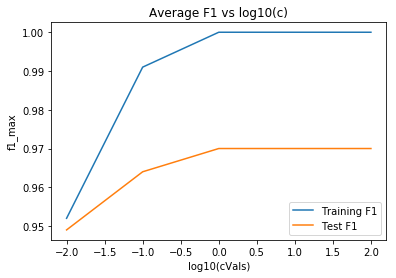

In [5]:
# Note: higher c the better, so basically we want negligible penalty from weight function.
cVals = [0.01,0.1,1,10,100]
c_f1_train_avg = []
c_f1_test_avg = []
kf = KFold(n_splits=5)
for c in cVals:
    kf_f1_train = []
    kf_f1_test = []
    kf_f1_train_avg = []
    kf_f1_test_avg = []
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    for train, test in kf.split(x_train_svm):            

        Xtr = x_train_svm[train,:]
        ytr = y_train_svm[train]
        Xts = x_train_svm[test,:]
        yts = y_train_svm[test]

        svc_linear.fit(Xtr, ytr)

        f1_train= f1_score(ytr,svc_linear.predict(Xtr),average='weighted') 
        f1_test= f1_score(yts,svc_linear.predict(Xts),average='weighted') 

        kf_f1_train.append(f1_train)
        kf_f1_test.append(f1_test)

    # Take average values for the kfold
    kf_f1_train_avg = np.mean(kf_f1_train)
    kf_f1_test_avg = np.mean(kf_f1_test)
    
    # For plotting
    c_f1_train_avg.append(round(kf_f1_train_avg,3))
    c_f1_test_avg.append(round(kf_f1_test_avg,3))
    

plt.plot(np.log10(cVals),c_f1_train_avg,
        np.log10(cVals),c_f1_test_avg)
plt.title('Average F1 vs log10(c)')
plt.xlabel('log10(cVals)')
plt.ylabel('f1_max')

i=0
print("c\t c_f1_train_avg\t c_f1_test_avg")
for iter in cVals:
    print(cVals[i],'\t', c_f1_train_avg[i],'\t\t', c_f1_test_avg[i])
    i=i+1
plt.legend(['Training F1', 'Test F1'], loc='lower right')

print("Best choice: c=1e4")
svc_linear_best = svm.SVC(probability = False, kernel = 'linear', C = 1e4)
svc_linear_best.fit(x_train_svm, y_train_svm)
f1_best_linear_default= round(f1_score(y_test_svm,svc_linear_best.predict(x_test_svm),average='weighted'),3)
print("F1=",f1_best_linear_default)

# SVM using Radial Basis Function(RBF) Kernel.

c	 c_f1_train_avg	 c_f1_test_avg
0.1 	 0.927 		 0.889
1 	 0.991 		 0.945
10 	 1.0 		 0.96
100 	 1.0 		 0.96
Best choice: c= 10.0
F1= 0.76


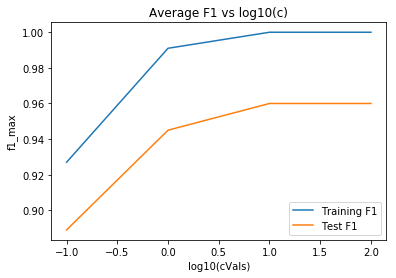

In [6]:
# Note: higher c the better, so basically we want negligible penalty from weight function.
cVals = [0.1,1,10,100]
c_f1_train_avg = []
c_f1_test_avg = []
kf = KFold(n_splits=5)
for c in cVals:
    kf_f1_train = []
    kf_f1_test = []
    kf_f1_train_avg = []
    kf_f1_test_avg = []
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c,gamma='auto')
    for train, test in kf.split(x_train_svm):            

        Xtr = x_train_svm[train,:]
        ytr = y_train_svm[train]
        Xts = x_train_svm[test,:]
        yts = y_train_svm[test]

        svc_rbf.fit(Xtr, ytr)

        f1_train= f1_score(ytr,svc_rbf.predict(Xtr),average='weighted') 
        f1_test= f1_score(yts,svc_rbf.predict(Xts),average='weighted') 

        kf_f1_train.append(f1_train)
        kf_f1_test.append(f1_test)

    # Take average values for the kfold
    kf_f1_train_avg = np.mean(kf_f1_train)
    kf_f1_test_avg = np.mean(kf_f1_test)
    
    # For plotting
    c_f1_train_avg.append(round(kf_f1_train_avg,3))
    c_f1_test_avg.append(round(kf_f1_test_avg,3))
    

plt.plot(np.log10(cVals),c_f1_train_avg,
        np.log10(cVals),c_f1_test_avg)
plt.title('Average F1 vs log10(c)')
plt.xlabel('log10(cVals)')
plt.ylabel('f1_max')

i=0
print("c\t c_f1_train_avg\t c_f1_test_avg")
for iter in cVals:
    print(cVals[i],'\t', c_f1_train_avg[i],'\t\t', c_f1_test_avg[i])
    i=i+1
plt.legend(['Training F1', 'Test F1'], loc='lower right')

best_c=1e1
print("Best choice: c=",best_c)
svc_rbf_best = svm.SVC(probability = False, kernel = 'rbf', C = best_c,gamma='auto')
svc_rbf_best.fit(x_train_svm, y_train_svm)
f1_best_rbf_default= round(f1_score(y_test_svm,svc_rbf_best.predict(x_test_svm),average='weighted'),3)
print("F1=",f1_best_rbf_default)

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

c	 c_f1_train_avg	 c_f1_test_avg
1 	 0.913 		 0.824
10 	 0.992 		 0.918
100 	 1.0 		 0.923
Best choice: c= 10.0
F1= 0.716


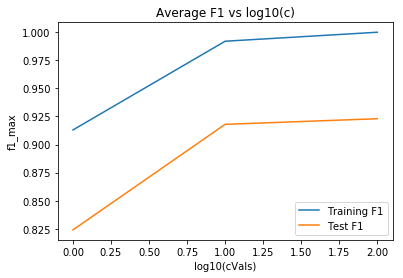

In [7]:
# Note: higher c the better, so basically we want negligible penalty from weight function.
cVals = [1,10,100]
c_f1_train_avg = []
c_f1_test_avg = []
kf = KFold(n_splits=5)
for c in cVals:
    kf_f1_train = []
    kf_f1_test = []
    kf_f1_train_avg = []
    kf_f1_test_avg = []
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c, gamma='auto')
    for train, test in kf.split(x_train_svm):            

        Xtr = x_train_svm[train,:]
        ytr = y_train_svm[train]
        Xts = x_train_svm[test,:]
        yts = y_train_svm[test]

        svc_poly.fit(Xtr, ytr)

        f1_train= f1_score(ytr,svc_poly.predict(Xtr),average='weighted') 
        f1_test= f1_score(yts,svc_poly.predict(Xts),average='weighted') 

        kf_f1_train.append(f1_train)
        kf_f1_test.append(f1_test)

    # Take average values for the kfold
    kf_f1_train_avg = np.mean(kf_f1_train)
    kf_f1_test_avg = np.mean(kf_f1_test)
    
    # For plotting
    c_f1_train_avg.append(round(kf_f1_train_avg,3))
    c_f1_test_avg.append(round(kf_f1_test_avg,3))
    

plt.plot(np.log10(cVals),c_f1_train_avg,
        np.log10(cVals),c_f1_test_avg)
plt.title('Average F1 vs log10(c)')
plt.xlabel('log10(cVals)')
plt.ylabel('f1_max')

i=0
print("c\t c_f1_train_avg\t c_f1_test_avg")
for iter in cVals:
    print(cVals[i],'\t', c_f1_train_avg[i],'\t\t', c_f1_test_avg[i])
    i=i+1
plt.legend(['Training F1', 'Test F1'], loc='lower right')

best_c=1e1
print("Best choice: c=",best_c)
svc_poly_best = svm.SVC(probability = False, kernel = 'poly', C = best_c, gamma='auto')
svc_poly_best.fit(x_train_svm, y_train_svm)
f1_best_poly_default= round(f1_score(y_test_svm,svc_poly_best.predict(x_test_svm),average='weighted'),3)
print("F1=",f1_best_poly_default)

## Redoing split

In [8]:
#the data as manually concatenated in excel of training and test as provided by the database
from sklearn.model_selection import train_test_split #for splitting the data into train and test
from sklearn.preprocessing import StandardScaler #for zero-mean and unit variance
sc = StandardScaler()
df= pd.read_csv('data.csv',delim_whitespace=False)
# print(df.shape)
class_mapping={label:idx for idx,label in enumerate(np.unique(df['class']))}
df['class']=df['class'].map(class_mapping)
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values # the first column is class header
x_train70, x_test30, y_train70, y_test30 = train_test_split(X, y, test_size=0.3) # we will be using 70:30 for train vs. test as we want to maximize the training data size and the ratio has also shown better performance in nerual algorithm processing
x_train70 = sc.fit_transform(x_train70)
x_test30 = sc.fit_transform(x_test30)
from sklearn import svm
from sklearn.metrics import confusion_matrix
#     print(confusion_matrix(y_test_svm, svc_rbf.predict(x_test_svm)))
from sklearn.metrics import f1_score
#Preprocessing data. There is no need for shuffling the data since it is already shuffled. 

x_train70 = preprocessing.scale(x_train70.data)
x_test30_svm = preprocessing.scale(x_test30.data)

x_train70_svm=x_train70
y_train70_svm=y_train70
x_test30_svm=x_test30
y_test30_svm=y_test30
x_test30_svm.shape


(157, 27)

## Linear SVM

c	 c_f1_train_avg	 c_f1_test_avg
0.01 	 0.888 		 0.878
0.1 	 0.916 		 0.887
1 	 0.94 		 0.879
10 	 0.964 		 0.857
100 	 0.981 		 0.82
Best choice: c= 0.1
F1= 0.916


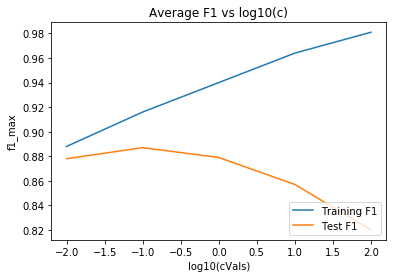

In [9]:
# Note: higher c the better, so basically we want negligible penalty from weight function.
cVals = [0.01,0.1,1,10,100]
c_f1_train_avg = []
c_f1_test_avg = []
kf = KFold(n_splits=5)
for c in cVals:
    kf_f1_train = []
    kf_f1_test = []
    kf_f1_train_avg = []
    kf_f1_test_avg = []
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    for train, test in kf.split(x_train70_svm):            

        Xtr = x_train70_svm[train,:]
        ytr = y_train70_svm[train]
        Xts = x_train70_svm[test,:]
        yts = y_train70_svm[test]

        svc_linear.fit(Xtr, ytr)

        f1_train= f1_score(ytr,svc_linear.predict(Xtr),average='weighted') 
        f1_test= f1_score(yts,svc_linear.predict(Xts),average='weighted') 

        kf_f1_train.append(f1_train)
        kf_f1_test.append(f1_test)

    # Take average values for the kfold
    kf_f1_train_avg = np.mean(kf_f1_train)
    kf_f1_test_avg = np.mean(kf_f1_test)
    
    # For plotting
    c_f1_train_avg.append(round(kf_f1_train_avg,3))
    c_f1_test_avg.append(round(kf_f1_test_avg,3))
    

plt.plot(np.log10(cVals),c_f1_train_avg,
        np.log10(cVals),c_f1_test_avg)
plt.title('Average F1 vs log10(c)')
plt.xlabel('log10(cVals)')
plt.ylabel('f1_max')

i=0
print("c\t c_f1_train_avg\t c_f1_test_avg")
for iter in cVals:
    print(cVals[i],'\t', c_f1_train_avg[i],'\t\t', c_f1_test_avg[i])
    i=i+1
plt.legend(['Training F1', 'Test F1'], loc='lower right')

best_c=1e-1
print("Best choice: c=",best_c)
svc_linear_best = svm.SVC(probability = False, kernel = 'linear', C = best_c)
svc_linear_best.fit(x_train70_svm, y_train70_svm)
f1_best_linear_custom= round(f1_score(y_test30_svm,svc_linear_best.predict(x_test30_svm),average='weighted'),3)
print("F1=",f1_best_linear_custom)

## SVM rbf

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

c	 c_f1_train_avg	 c_f1_test_avg
0.1 	 0.539 		 0.484
1 	 0.927 		 0.867
10 	 0.985 		 0.887
100 	 1.0 		 0.855
1000.0 	 1.0 		 0.855
10000.0 	 1.0 		 0.855
100000.0 	 1.0 		 0.855
Best choice: c= 1.0
F1= 0.891


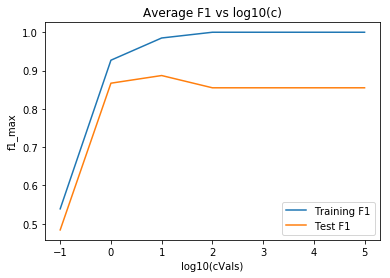

In [10]:
# Note: higher c the better, so basically we want negligible penalty from weight function.
cVals = [0.1,1,10,100,1e3,1e4,1e5]
c_f1_train_avg = []
c_f1_test_avg = []
kf = KFold(n_splits=5)
for c in cVals:
    kf_f1_train = []
    kf_f1_test = []
    kf_f1_train_avg = []
    kf_f1_test_avg = []
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c,gamma='auto')
    for train, test in kf.split(x_train_svm):            

        Xtr = x_train70_svm[train,:]
        ytr = y_train70_svm[train]
        Xts = x_train70_svm[test,:]
        yts = y_train70_svm[test]

        svc_rbf.fit(Xtr, ytr)

        f1_train= f1_score(ytr,svc_rbf.predict(Xtr),average='weighted') 
        f1_test= f1_score(yts,svc_rbf.predict(Xts),average='weighted') 

        kf_f1_train.append(f1_train)
        kf_f1_test.append(f1_test)

    # Take average values for the kfold
    kf_f1_train_avg = np.mean(kf_f1_train)
    kf_f1_test_avg = np.mean(kf_f1_test)
    
    # For plotting
    c_f1_train_avg.append(round(kf_f1_train_avg,3))
    c_f1_test_avg.append(round(kf_f1_test_avg,3))
    

plt.plot(np.log10(cVals),c_f1_train_avg,
        np.log10(cVals),c_f1_test_avg)
plt.title('Average F1 vs log10(c)')
plt.xlabel('log10(cVals)')
plt.ylabel('f1_max')

i=0
print("c\t c_f1_train_avg\t c_f1_test_avg")
for iter in cVals:
    print(cVals[i],'\t', c_f1_train_avg[i],'\t\t', c_f1_test_avg[i])
    i=i+1
plt.legend(['Training F1', 'Test F1'], loc='lower right')

best_c=1e0
print("Best choice: c=",best_c)
svc_rbf_best = svm.SVC(probability = False, kernel = 'rbf', C = best_c,gamma='auto')
svc_rbf_best.fit(x_train70_svm, y_train70_svm)
f1_best_rbf_custom= round(f1_score(y_test30_svm,svc_rbf_best.predict(x_test30_svm),average='weighted'),3)
print("F1=",f1_best_rbf_custom)

## SVM poly

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


c	 c_f1_train_avg	 c_f1_test_avg
1 	 0.821 		 0.694
10 	 0.957 		 0.823
100 	 0.995 		 0.832
Best choice: c= 10.0
F1= 0.85


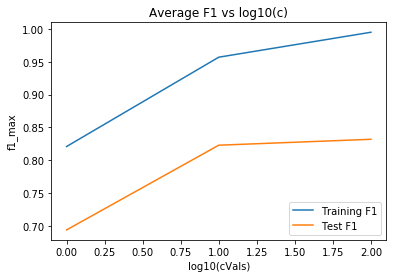

In [18]:
# Note: higher c the better, so basically we want negligible penalty from weight function.
cVals = [1,10,100]
c_f1_train_avg = []
c_f1_test_avg = []
kf = KFold(n_splits=5)
for c in cVals:
    kf_f1_train = []
    kf_f1_test = []
    kf_f1_train_avg = []
    kf_f1_test_avg = []
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c, gamma='auto')
    for train, test in kf.split(x_train_svm):            

        Xtr = x_train70_svm[train,:]
        ytr = y_train70_svm[train]
        Xts = x_train70_svm[test,:]
        yts = y_train70_svm[test]

        svc_poly.fit(Xtr, ytr)

        f1_train= f1_score(ytr,svc_poly.predict(Xtr),average='weighted') 
        f1_test= f1_score(yts,svc_poly.predict(Xts),average='weighted') 

        kf_f1_train.append(f1_train)
        kf_f1_test.append(f1_test)

    # Take average values for the kfold
    kf_f1_train_avg = np.mean(kf_f1_train)
    kf_f1_test_avg = np.mean(kf_f1_test)
    
    # For plotting
    c_f1_train_avg.append(round(kf_f1_train_avg,3))
    c_f1_test_avg.append(round(kf_f1_test_avg,3))
    

plt.plot(np.log10(cVals),c_f1_train_avg,
        np.log10(cVals),c_f1_test_avg)
plt.title('Average F1 vs log10(c)')
plt.xlabel('log10(cVals)')
plt.ylabel('f1_max')

i=0
print("c\t c_f1_train_avg\t c_f1_test_avg")
for iter in cVals:
    print(cVals[i],'\t', c_f1_train_avg[i],'\t\t', c_f1_test_avg[i])
    i=i+1
plt.legend(['Training F1', 'Test F1'], loc='lower right')

best_c=1e1
print("Best choice: c=",best_c)
svc_poly_best = svm.SVC(probability = False, kernel = 'poly', C = best_c, gamma='auto')
svc_poly_best.fit(x_train70_svm, y_train70_svm)
f1_best_poly_custom= round(f1_score(y_test30_svm,svc_poly_best.predict(x_test30_svm),average='weighted'),3)
print("F1=",f1_best_poly_custom)

# Result

In [22]:
df2 = pd.DataFrame(np.array([['Original (38:62)',f1_best_linear_default, f1_best_rbf_default,  f1_best_poly_default], ['Custom (70:30)', f1_best_linear_custom, f1_best_rbf_custom, f1_best_poly_custom]]), columns=['Split','Linear', 'RBF','Poly'])
df2

,Split,Linear,RBF,Poly
0,Original (38:62),0.725,0.76,0.716
1,Custom (70:30),0.916,0.891,0.85
